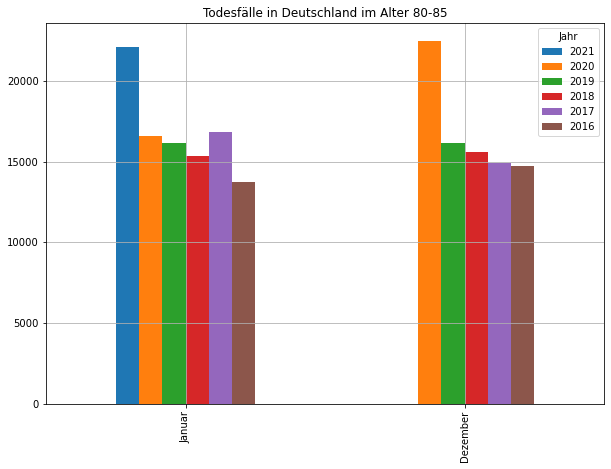

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('deaths_month_age.csv')
df.set_index(['Jahr', 'Alter'], inplace = True)

Alter = '80-85'
figure = df[['Januar', 'Dezember']].xs(Alter, level = 'Alter').T.astype('float').plot(kind = 'bar', figsize = (10, 7), grid = True, title = 'Todesfälle in Deutschland im Alter ' + Alter)
plt.savefig('stonks.jpg')